# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['timezone']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethlehem
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | yulara
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | gualaquiza
Processing Record 6 of Set 1 | dingle
Processing Record 7 of Set 1 | juneau
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | eyl
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | tabat
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | namatanai
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | labuhan
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | xichang
Processing Record 21 of Set 1 | irbil
Processing Record 22 of Set 1 | adrar
Processing Record 23 of Set 1 | hermanus
Processing Rec

Processing Record 39 of Set 4 | aklavik
Processing Record 40 of Set 4 | cairns
Processing Record 41 of Set 4 | pasighat
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | conceicao da barra
Processing Record 44 of Set 4 | preobrazheniye
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | benghazi
Processing Record 48 of Set 4 | mareeba
Processing Record 49 of Set 4 | leh
Processing Record 0 of Set 5 | saint anthony
Processing Record 1 of Set 5 | bandundu
Processing Record 2 of Set 5 | bastia
Processing Record 3 of Set 5 | nalut
Processing Record 4 of Set 5 | huesca
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | puerto ayora
Processing Record 7 of Set 5 | mabaruma
Processing Record 8 of Set 5 | karauzyak
City not found. Skipping...
Processing Record 9 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 10 of Set 

Processing Record 26 of Set 8 | kununurra
Processing Record 27 of Set 8 | opuwo
Processing Record 28 of Set 8 | teya
Processing Record 29 of Set 8 | kozhevnikovo
Processing Record 30 of Set 8 | broken arrow
Processing Record 31 of Set 8 | hokitika
Processing Record 32 of Set 8 | la peca
Processing Record 33 of Set 8 | iquitos
Processing Record 34 of Set 8 | serebryanyy bor
Processing Record 35 of Set 8 | sur
Processing Record 36 of Set 8 | galbshtadt
Processing Record 37 of Set 8 | price
Processing Record 38 of Set 8 | yanan
City not found. Skipping...
Processing Record 39 of Set 8 | pyay
Processing Record 40 of Set 8 | ahumada
City not found. Skipping...
Processing Record 41 of Set 8 | tieli
Processing Record 42 of Set 8 | north bend
Processing Record 43 of Set 8 | tombouctou
Processing Record 44 of Set 8 | ixtapa
Processing Record 45 of Set 8 | axim
Processing Record 46 of Set 8 | polis
Processing Record 47 of Set 8 | loandjili
Processing Record 48 of Set 8 | ippy
Processing Record 4

Processing Record 11 of Set 12 | maldonado
Processing Record 12 of Set 12 | salalah
Processing Record 13 of Set 12 | san ramon
Processing Record 14 of Set 12 | kiomboi
Processing Record 15 of Set 12 | huntington
Processing Record 16 of Set 12 | nanyang
Processing Record 17 of Set 12 | carmo do paranaiba
Processing Record 18 of Set 12 | havoysund
Processing Record 19 of Set 12 | palmer
Processing Record 20 of Set 12 | znamenskoye
Processing Record 21 of Set 12 | wahpeton
Processing Record 22 of Set 12 | ulaangom
Processing Record 23 of Set 12 | honiara
Processing Record 24 of Set 12 | shimoda
Processing Record 25 of Set 12 | mackenzie
Processing Record 26 of Set 12 | sistranda
Processing Record 27 of Set 12 | almaznyy
Processing Record 28 of Set 12 | chenghai
Processing Record 29 of Set 12 | touros
Processing Record 30 of Set 12 | yaan
Processing Record 31 of Set 12 | winneba
Processing Record 32 of Set 12 | ambilobe
Processing Record 33 of Set 12 | huaicheng
Processing Record 34 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethlehem,-1.4558,-48.5044,24.02,94,75,7.72,BR,-10800
1,new norfolk,-42.7826,147.0587,12.73,70,100,2.68,AU,39600
2,yulara,-25.2406,130.9889,24.89,19,0,3.88,AU,34200
3,atuona,-9.8000,-139.0333,25.00,81,28,6.68,PF,-34200
4,gualaquiza,-3.4000,-78.5500,27.27,52,33,2.14,EC,-18000


In [6]:
# format the Date column
from datetime import timezone
import datetime
import calendar  

dt = datetime.datetime.now(timezone.utc) 
utc_time = dt.replace(tzinfo=timezone.utc)
utc_timestamp = utc_time.timestamp()
ls = []
for item in city_data_df["Date"]:
    current_GMT = time.gmtime(item)
    ts = calendar.timegm(current_GMT)
    ls.append(int(ts*1000 + utc_timestamp))
city_data_df["Date"] = ls
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethlehem,-1.4558,-48.5044,24.02,94,75,7.72,BR,1659382740
1,new norfolk,-42.7826,147.0587,12.73,70,100,2.68,AU,1709782740
2,yulara,-25.2406,130.9889,24.89,19,0,3.88,AU,1704382740
3,atuona,-9.8000,-139.0333,25.00,81,28,6.68,PF,1635982740
4,gualaquiza,-3.4000,-78.5500,27.27,52,33,2.14,EC,1652182740
5,dingle,10.9995,122.6711,24.31,93,100,2.89,PH,1698982740
6,juneau,58.3019,-134.4197,-2.10,86,20,0.00,US,1637782740
7,rikitea,-23.1203,-134.9692,23.65,83,60,6.71,PF,1637782740
8,bredasdorp,-34.5322,20.0403,16.47,62,98,2.59,ZA,1677382740
9,eyl,7.9803,49.8164,24.77,73,71,8.30,SO,1680982740


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethlehem,-1.4558,-48.5044,24.02,94,75,7.72,BR,1659382740
1,new norfolk,-42.7826,147.0587,12.73,70,100,2.68,AU,1709782740
2,yulara,-25.2406,130.9889,24.89,19,0,3.88,AU,1704382740
3,atuona,-9.8000,-139.0333,25.00,81,28,6.68,PF,1635982740
4,gualaquiza,-3.4000,-78.5500,27.27,52,33,2.14,EC,1652182740
5,dingle,10.9995,122.6711,24.31,93,100,2.89,PH,1698982740
6,juneau,58.3019,-134.4197,-2.10,86,20,0.00,US,1637782740
7,rikitea,-23.1203,-134.9692,23.65,83,60,6.71,PF,1637782740
8,bredasdorp,-34.5322,20.0403,16.47,62,98,2.59,ZA,1677382740


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

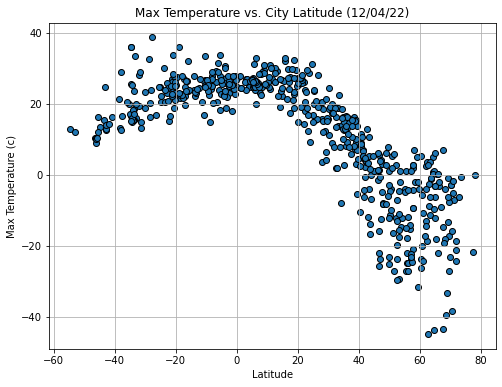

In [46]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(int(utc_timestamp)))

# Incorporate the other graph properties
plt.grid()
plt.title(f"Max Temperature vs. City Latitude ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

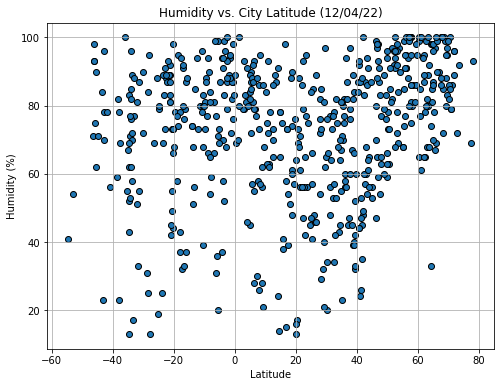

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(int(utc_timestamp)))


# Incorporate the other graph properties
plt.grid()
plt.title(f"Humidity vs. City Latitude ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

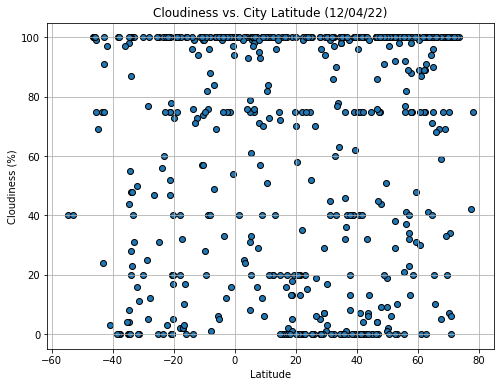

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(int(utc_timestamp)))

# Incorporate the other graph properties
plt.grid()
plt.title(f"Cloudiness vs. City Latitude ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

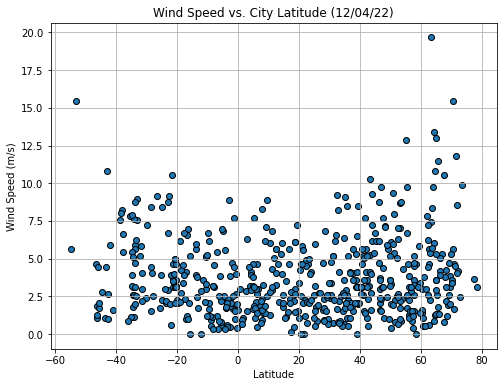

In [52]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(int(utc_timestamp)))

# Incorporate the other graph properties
plt.grid()
plt.title(f"Wind Speed vs. City Latitude ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def linreg(lat,vs,ylabel,xx,yy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(lat, vs)
    regress_value = lat * slope + intercept
    eqtn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8, 6))
    plt.scatter(x=lat, y=vs, edgecolors="black")
    plt.plot(lat, regress_value, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.annotate(eqtn,(xx,yy),fontsize=15,color="red")
    print(f"The r-value is : {rvalue**2}")
    plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,dingle,10.9995,122.6711,24.31,93,100,2.89,PH,1698982740
6,juneau,58.3019,-134.4197,-2.10,86,20,0.00,US,1637782740
9,eyl,7.9803,49.8164,24.77,73,71,8.30,SO,1680982740
11,tuktoyaktuk,69.4541,-133.0374,-27.00,83,20,3.09,CA,1644982740
13,yellowknife,62.4560,-114.3525,-18.71,65,75,5.66,CA,1644982740


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethlehem,-1.4558,-48.5044,24.02,94,75,7.72,BR,1659382740
1,new norfolk,-42.7826,147.0587,12.73,70,100,2.68,AU,1709782740
2,yulara,-25.2406,130.9889,24.89,19,0,3.88,AU,1704382740
3,atuona,-9.8000,-139.0333,25.00,81,28,6.68,PF,1635982740
4,gualaquiza,-3.4000,-78.5500,27.27,52,33,2.14,EC,1652182740


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7135856177363472


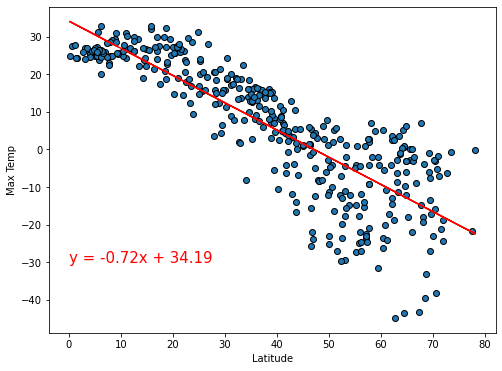

In [59]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp",0,-30)

The r-value is : 0.3016558964292274


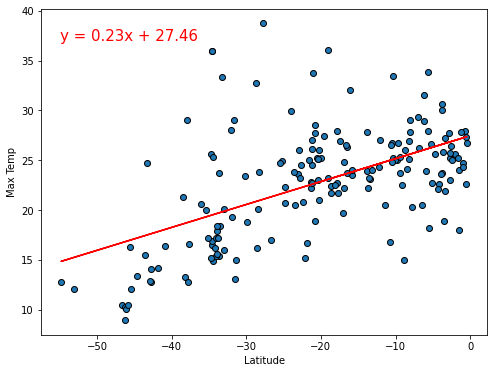

In [60]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp",-55,37)

**Discussion about the linear relationship:**

By looking at the scatterplots above we can clearly see that on Northern Hemisphere for greater latitudes, the maximum temperature gets lower and the relation between latitude and maximum temperature is inverse. For Southern Hemisphere on the other hand, the relation is not inverse, meaning the greater the latitude, the higher the max temperature gets.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.12560735777219895


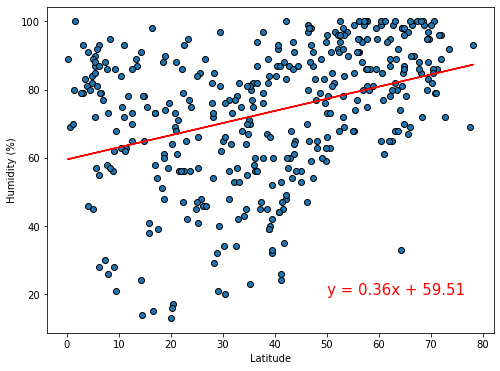

In [68]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity (%)",50,20)

The r-value is : 0.034993665668270564


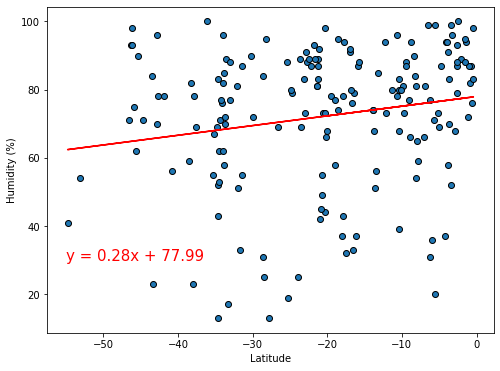

In [69]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity (%)",-55,30)

**Discussion about the linear relationship:**

These two charts demonstrate that the relation between latitude and humidity is always direct, doesn't matter if the city is on Northern or Southern Hemisphere. So the greater the latitude, the higher the humidity percentage. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.014220386194015429


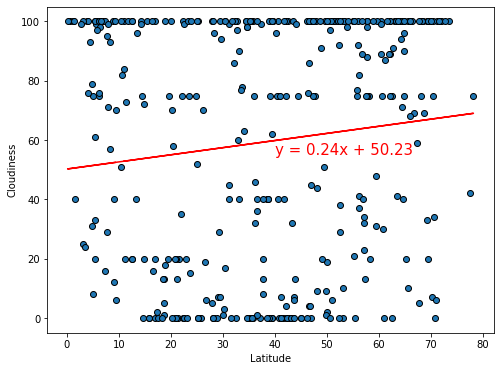

In [73]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness",40,55)

The r-value is : 0.04271206198414914


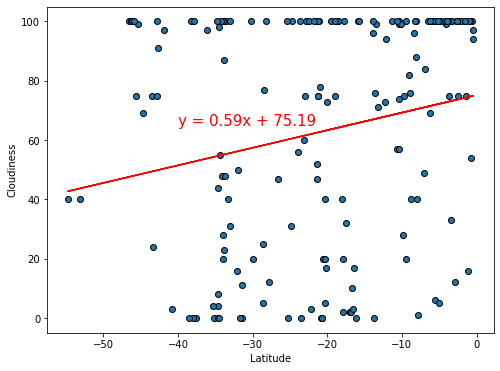

In [75]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness",-40,65)

**Discussion about the linear relationship:**

For cloudliness as well, we can see that the relation with latitude is always direct and it gets more cloudy on greater latitudes in both Northern or Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.04488150372894432


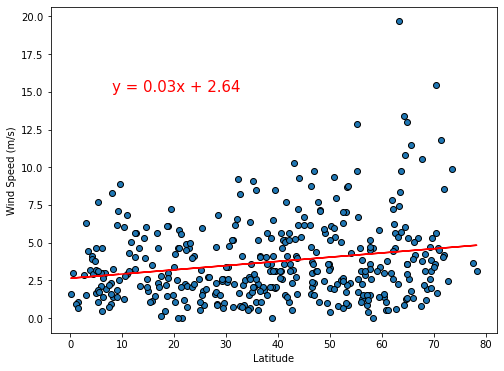

In [76]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed (m/s)",8,15)

The r-value is : 0.08758564711147762


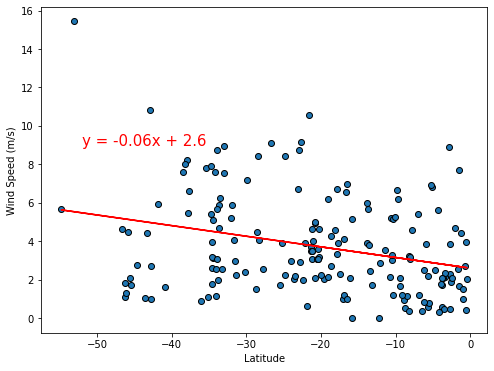

In [80]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed (m/s)",-52,9)

**Discussion about the linear relationship:** 

Diagrams above show that there's a slight change in wind speed with respect to latitude and for Northern Hemisphere this relation is direct so for greater latitudes we expect higher wind speed, and for Southern Hemisphere there's an inverse relation and wind speed drops at greater latitudes.